<a href="https://colab.research.google.com/github/Gatuha/Gatuha-Predictive-Modeling-of-Healthcare-Insurance/blob/main/Predictive_Modeling_of_Healthcare_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/insurance.csv')

df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check for any missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Explore basic statistics of numerical features
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###EDA

In [ ]:
numerical_features = ['age', 'bmi', 'children','charges']

In [ ]:
# Explore categorical features
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    unique_values = df[feature].unique()
    print("Unique values of", feature, ":", unique_values)

Unique values of sex : ['female' 'male']
Unique values of smoker : ['yes' 'no']
Unique values of region : ['southwest' 'southeast' 'northwest' 'northeast']


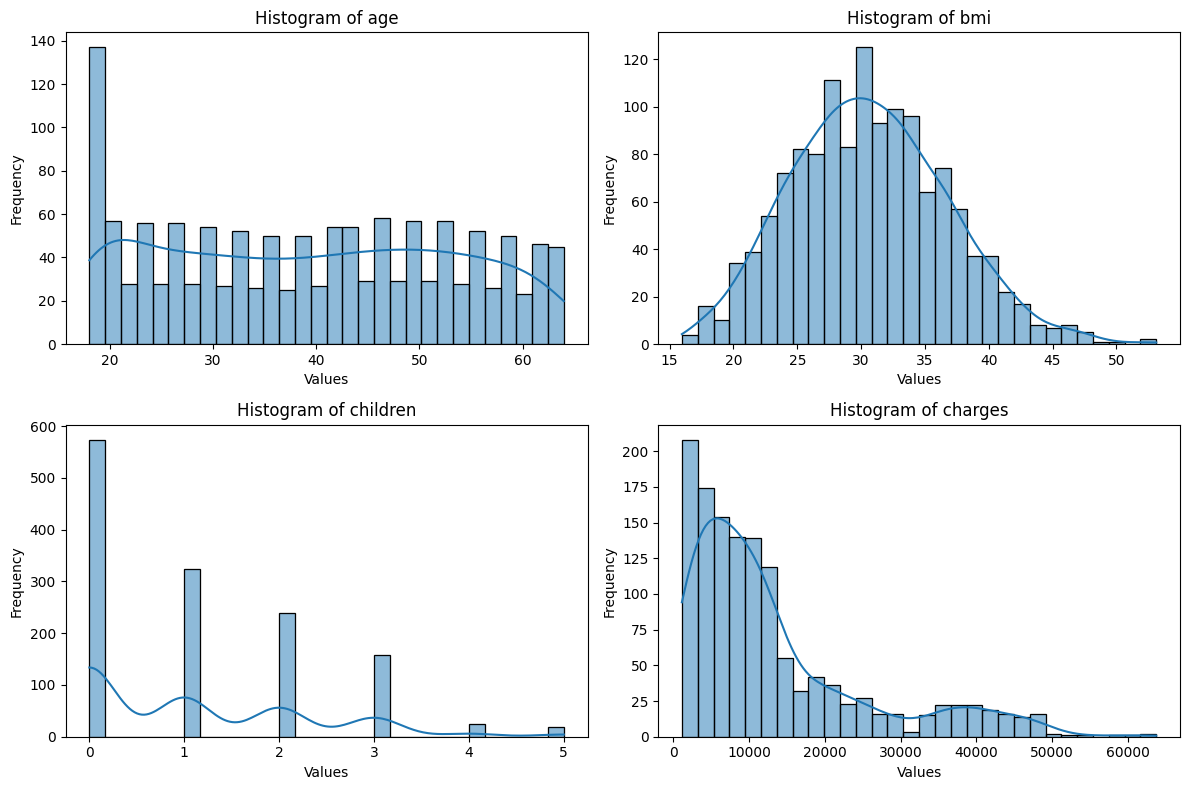

In [ ]:
# Visualize the distribution of numerical features using histograms
# Define numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

# Visualize the distribution of numerical features using histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title('Histogram of ' + feature)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

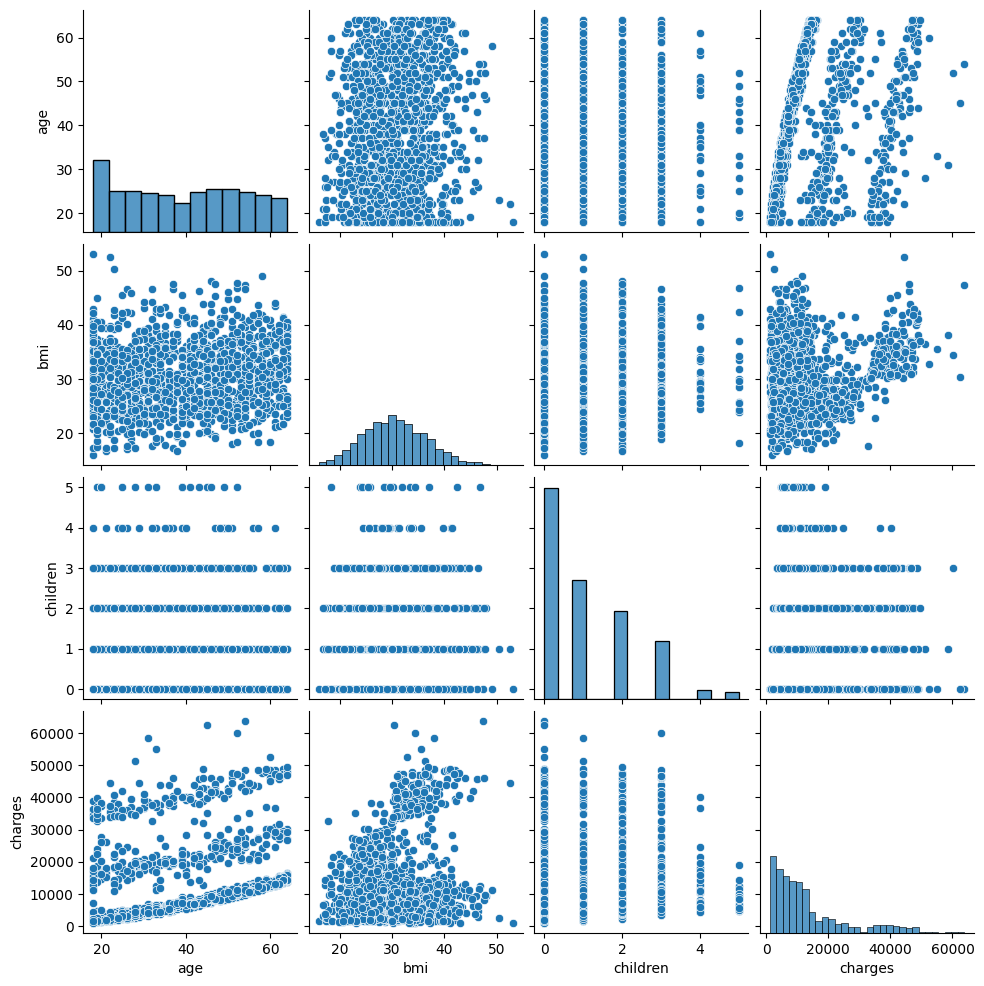

In [ ]:
# Visualize relationships between features using pair plots
sns.pairplot(df[numerical_features])
plt.show()

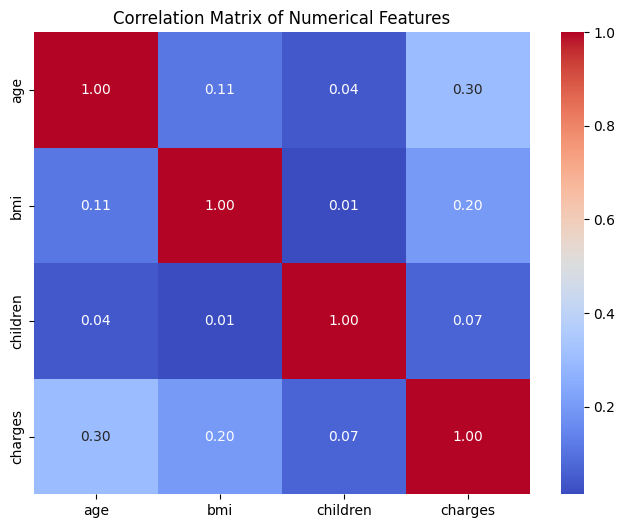

In [ ]:
# Analyze correlations between numerical features using correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

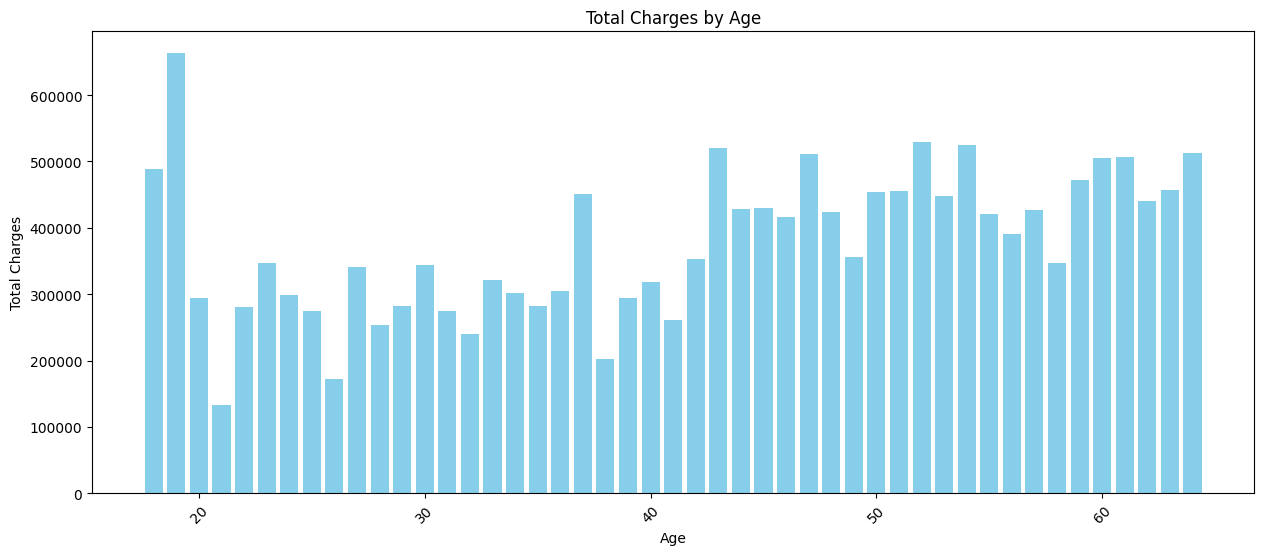

In [ ]:
# Calculate the total charges by age
charges_by_age = df.groupby('age')['charges'].sum()

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(charges_by_age.index, charges_by_age.values, color='skyblue')

# Add labels and title
plt.xlabel('Age')

plt.ylabel('Total Charges')
plt.title('Total Charges by Age')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

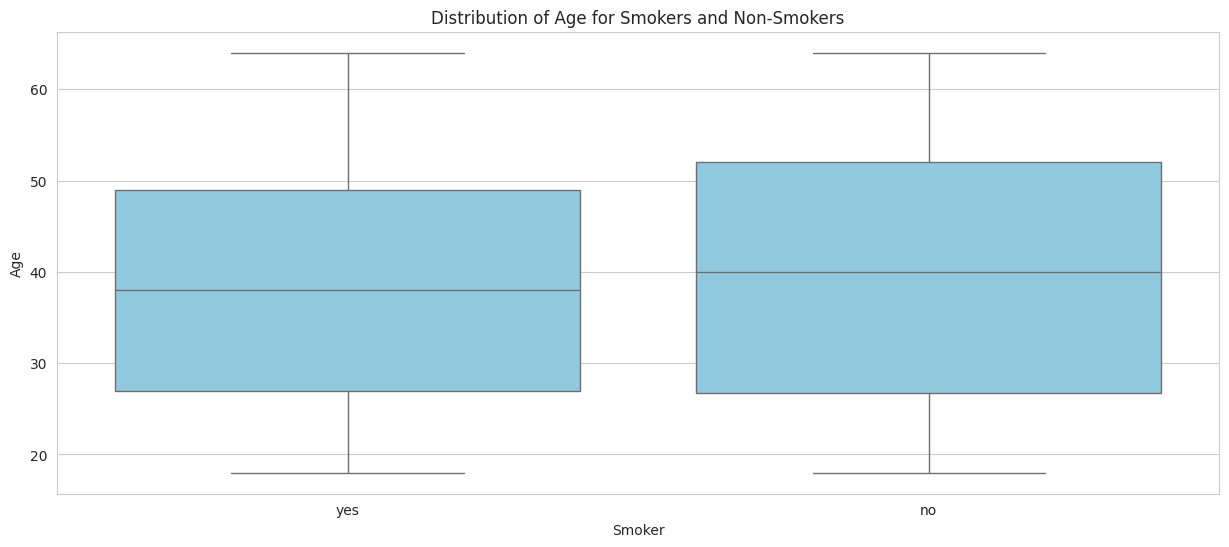

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a box plot to visualize the distribution of age for smokers and non-smokers
plt.figure(figsize=(15, 6))
sns.boxplot(x='smoker', y='age', data=df, color = 'skyblue')
plt.title('Distribution of Age for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()

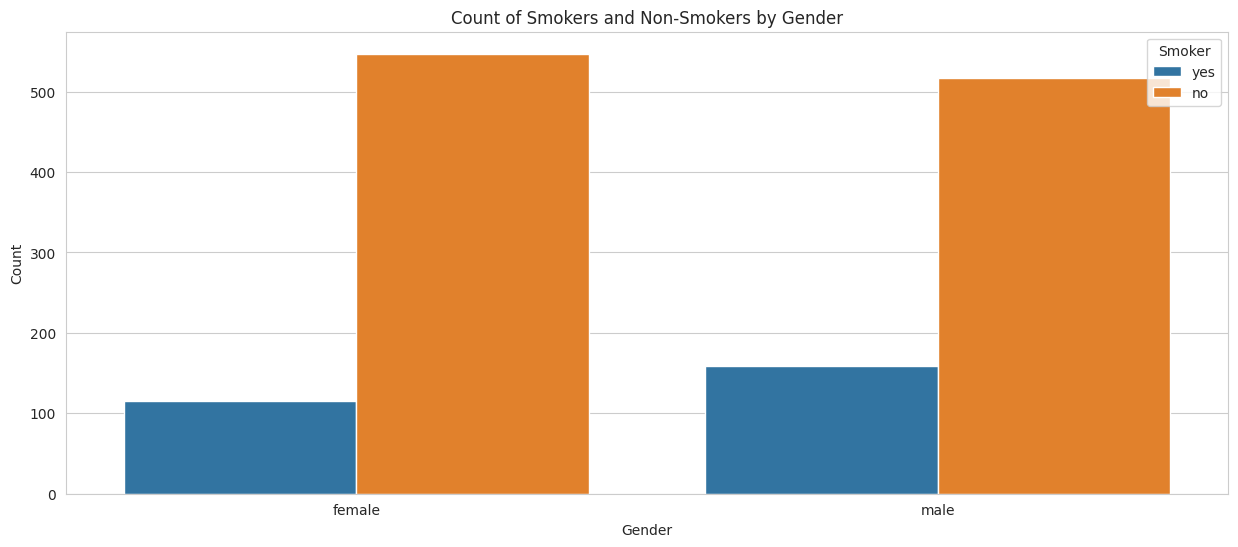

In [ ]:
# Create a count plot to visualize the count of smokers and non-smokers for each gender
plt.figure(figsize=(15, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Count of Smokers and Non-Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

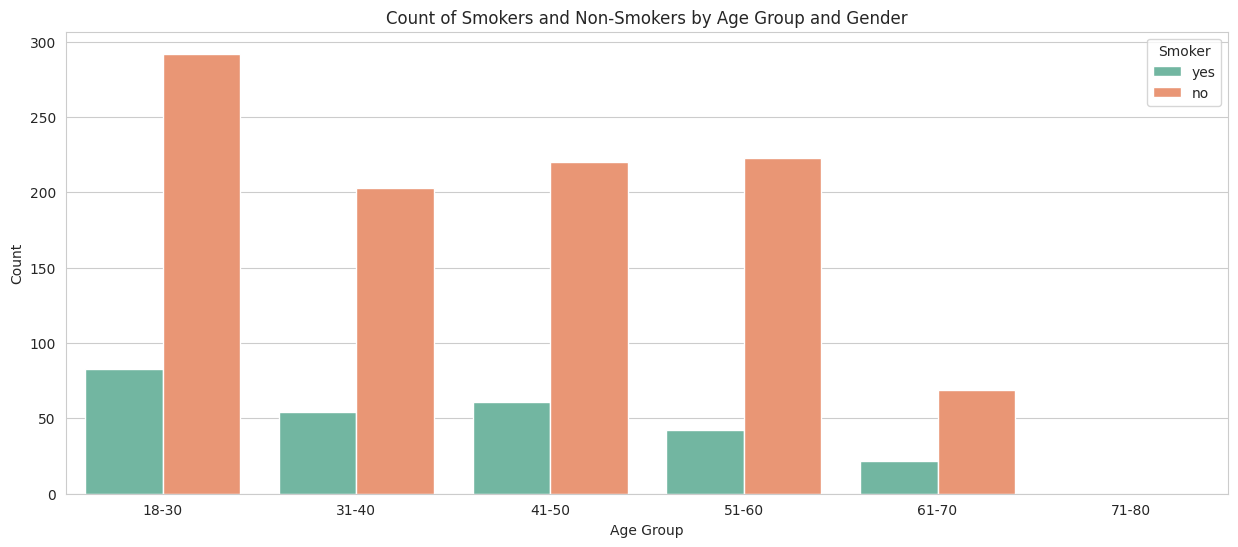

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create a bar plot to visualize the count of smokers and non-smokers for each gender within age groups
plt.figure(figsize=(15, 6))
sns.countplot(x='age_group', hue='smoker', data=df, palette='Set2', hue_order=['yes', 'no'])
plt.title('Count of Smokers and Non-Smokers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

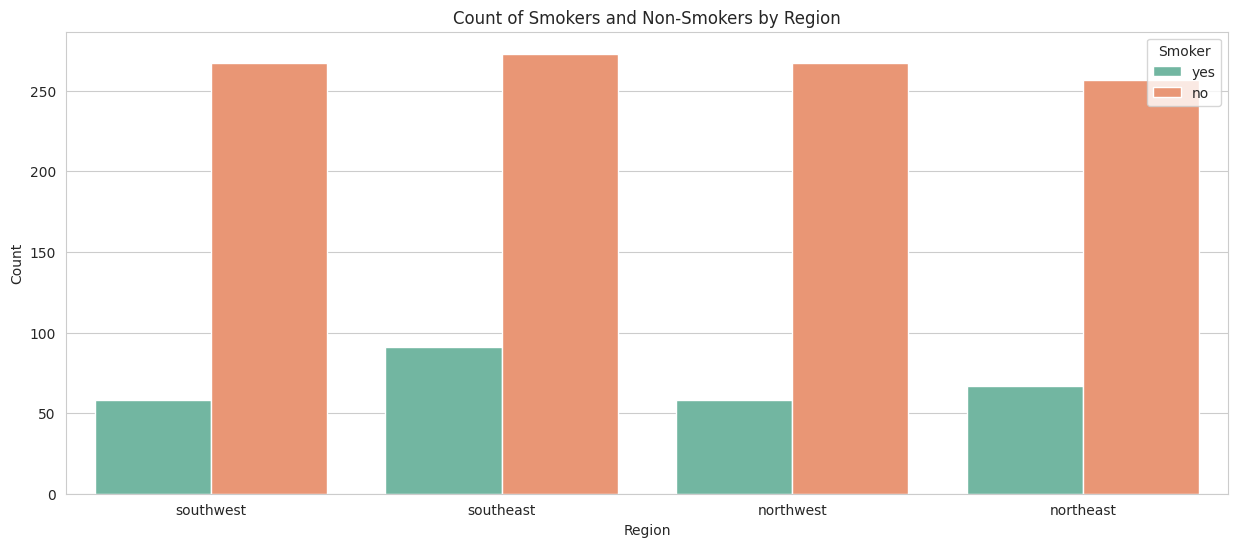

In [ ]:
# Create a count plot to visualize the count of smokers and non-smokers for each region
plt.figure(figsize=(15, 6))
sns.countplot(x='region', hue='smoker', data=df, palette='Set2', hue_order=['yes', 'no'])
plt.title('Count of Smokers and Non-Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

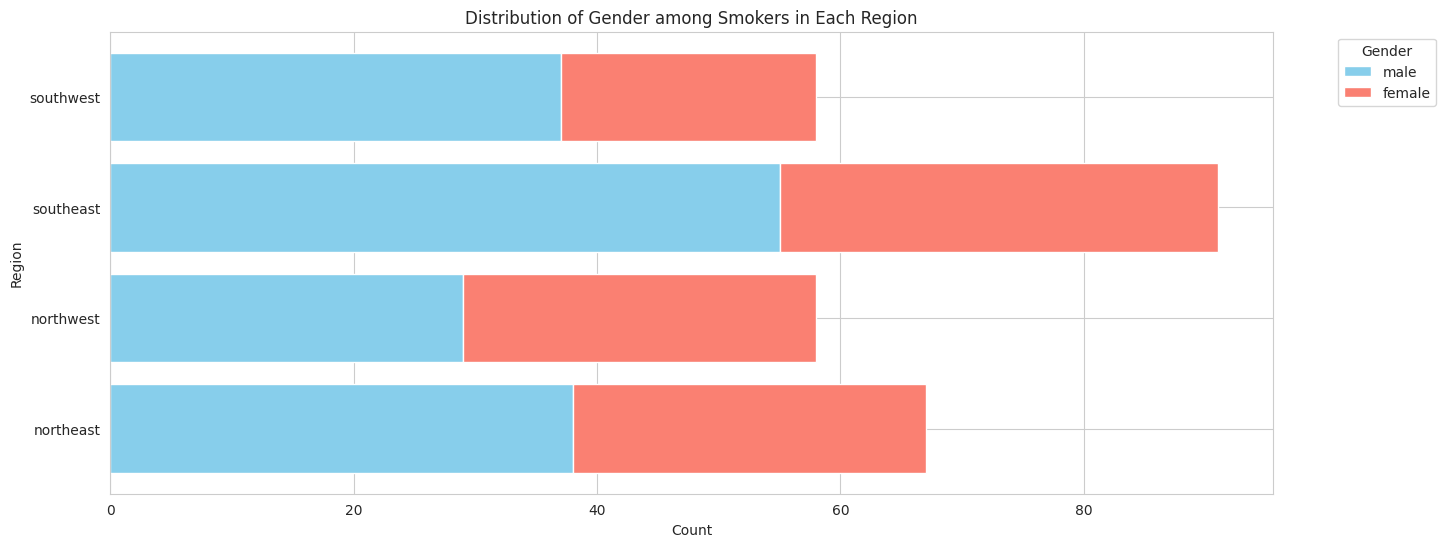

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Filter the dataframe to include only smokers
smokers_df = df[df['smoker'] == 'yes']

# Group the filtered dataframe by region and gender, and count the occurrences
region_gender_count = smokers_df.groupby(['region', 'sex']).size().unstack()

# Plotting
plt.figure(figsize=(15, 6))

# Define colors for genders
colors = {'male': 'skyblue', 'female': 'salmon'}

# Plot each region separately
for i, region in enumerate(region_gender_count.index):
    # Get the counts of male and female smokers for the current region
    counts = region_gender_count.loc[region]

    # Plot the stacked bars for male and female smokers
    plt.barh(y=i, width=counts['male'], color=colors['male'], label='male' if i == 0 else None)
    plt.barh(y=i, width=counts['female'], left=counts['male'], color=colors['female'], label='female' if i == 0 else None)

# Add labels and legend
plt.xlabel('Count')
plt.ylabel('Region')
plt.yticks(range(len(region_gender_count.index)), region_gender_count.index)
plt.title('Distribution of Gender among Smokers in Each Region')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In this plot:

Each bar represents a region.
The length of each bar represents the count of male and female smokers in that region.
Different colors represent different genders.
The legend indicates the gender corresponding to each color.

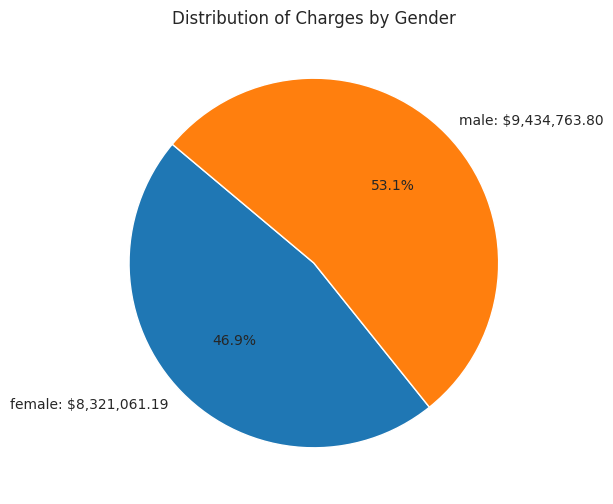

In [ ]:

# Calculate total charges for each gender
total_charges_by_gender = df.groupby('sex')['charges'].sum()

# Plotting a pie chart with values
plt.figure(figsize=(15, 6))
plt.pie(total_charges_by_gender, labels=[f"{gender}: ${charges:,.2f}" for gender, charges in total_charges_by_gender.items()], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charges by Gender')
plt.show()

In this pie chart:

Each slice represents a gender category (male or female).
The size of each slice represents the proportion of total charges for that gender category.
The label on each slice includes both the gender category and the corresponding total charges in dollars.

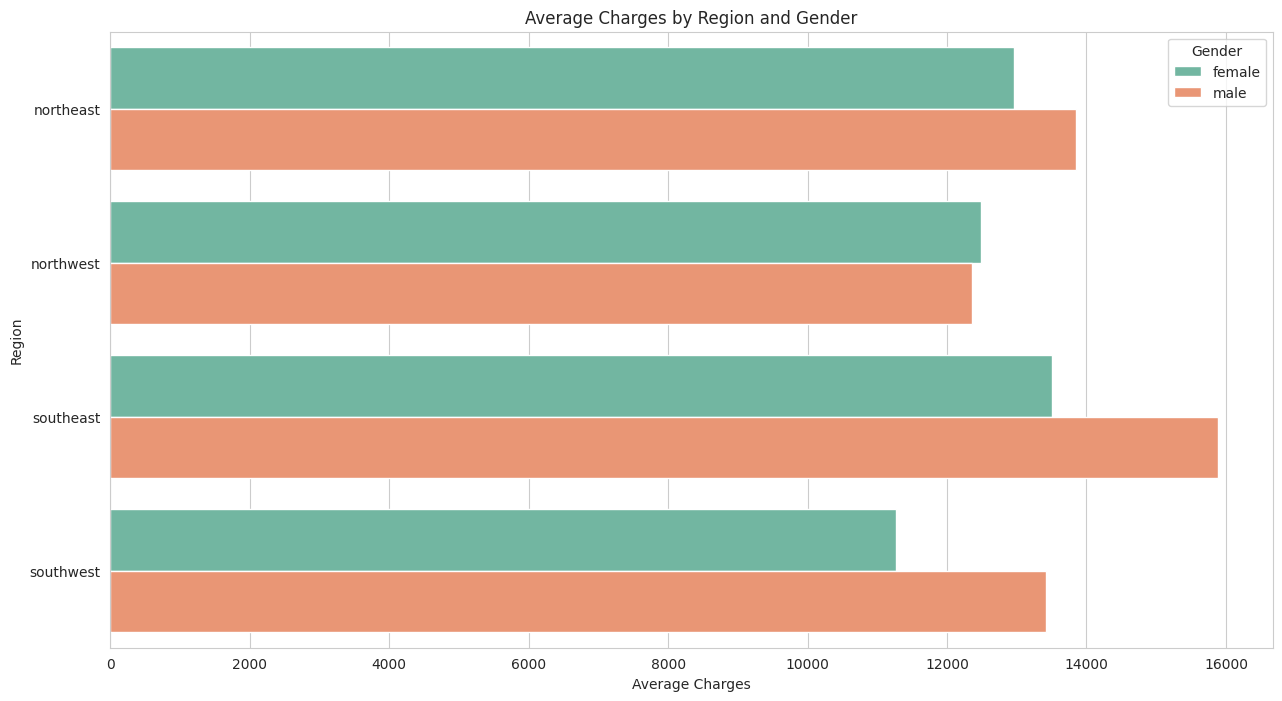

In [ ]:
# Calculate average charges for each combination of region and gender
average_charges_by_region_gender = df.groupby(['region', 'sex'])['charges'].mean().reset_index()

# Plotting a horizontal bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='charges', y='region', hue='sex', data=average_charges_by_region_gender, palette='Set2')
plt.title('Average Charges by Region and Gender')
plt.xlabel('Average Charges')
plt.ylabel('Region')
plt.legend(title='Gender')
plt.show()

##modelling

In [ ]:


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
# Define categorical and numerical features
categorical_features = ['region']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

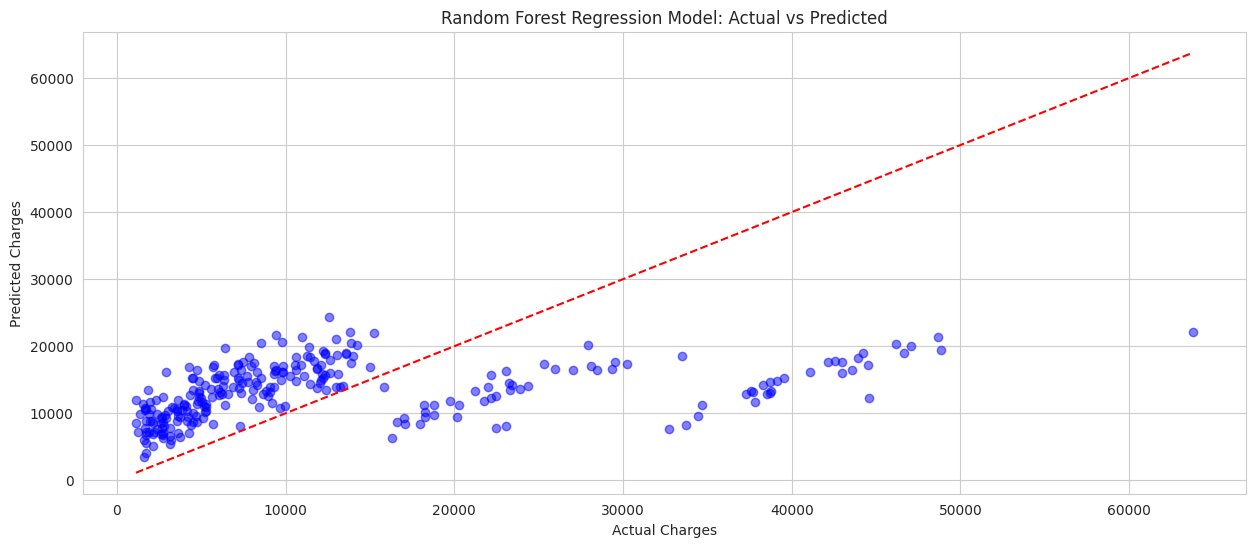

In [ ]:

# Plotting predicted vs actual values
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Random Forest Regression Model: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


In this plot:

Each point represents an instance in the test set.
The x-axis represents the actual charges.
The y-axis represents the predicted charges.
The red dashed line represents the line of perfect prediction, where actual charges equal predicted charges.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 130473257.44807306
Mean Absolute Error: 9139.763001184292
R-squared: 0.15958567780641264


In [ ]:
# Calculate the range of the target variable (charges)
charges_range = y_train.max() - y_train.min()

# Calculate mean squared error (MSE) as a percentage
mse_percentage = (mse / charges_range) * 100

# Calculate mean absolute error (MAE) as a percentage
mae_percentage = (mae / charges_range) * 100

# Display the performance metrics as percentages

print("Mean Absolute Error (% of charges range): {:.2f}%".format(mae_percentage))


Mean Absolute Error (% of charges range): 14.87%
